# Autistic Patients Classification

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('autism_screening.csv')

## Exploratory Data Analysis

In [6]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [7]:
df.shape

(704, 21)

In [8]:
df.size

14784

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [10]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [11]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [12]:
df.duplicated().sum()

5

In [13]:
df.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                46
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            6
Class/ASD           2
dtype: int64

## Data Visualization

In [15]:
sns.set(style="darkgrid")

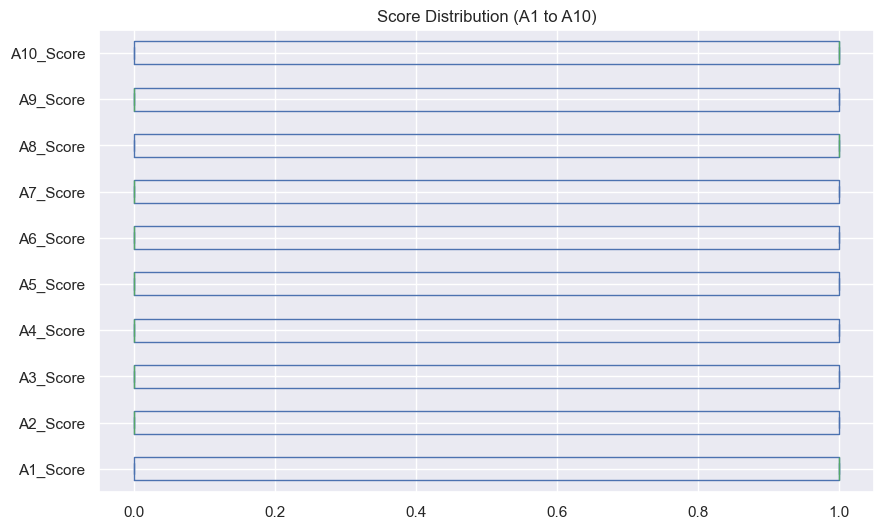

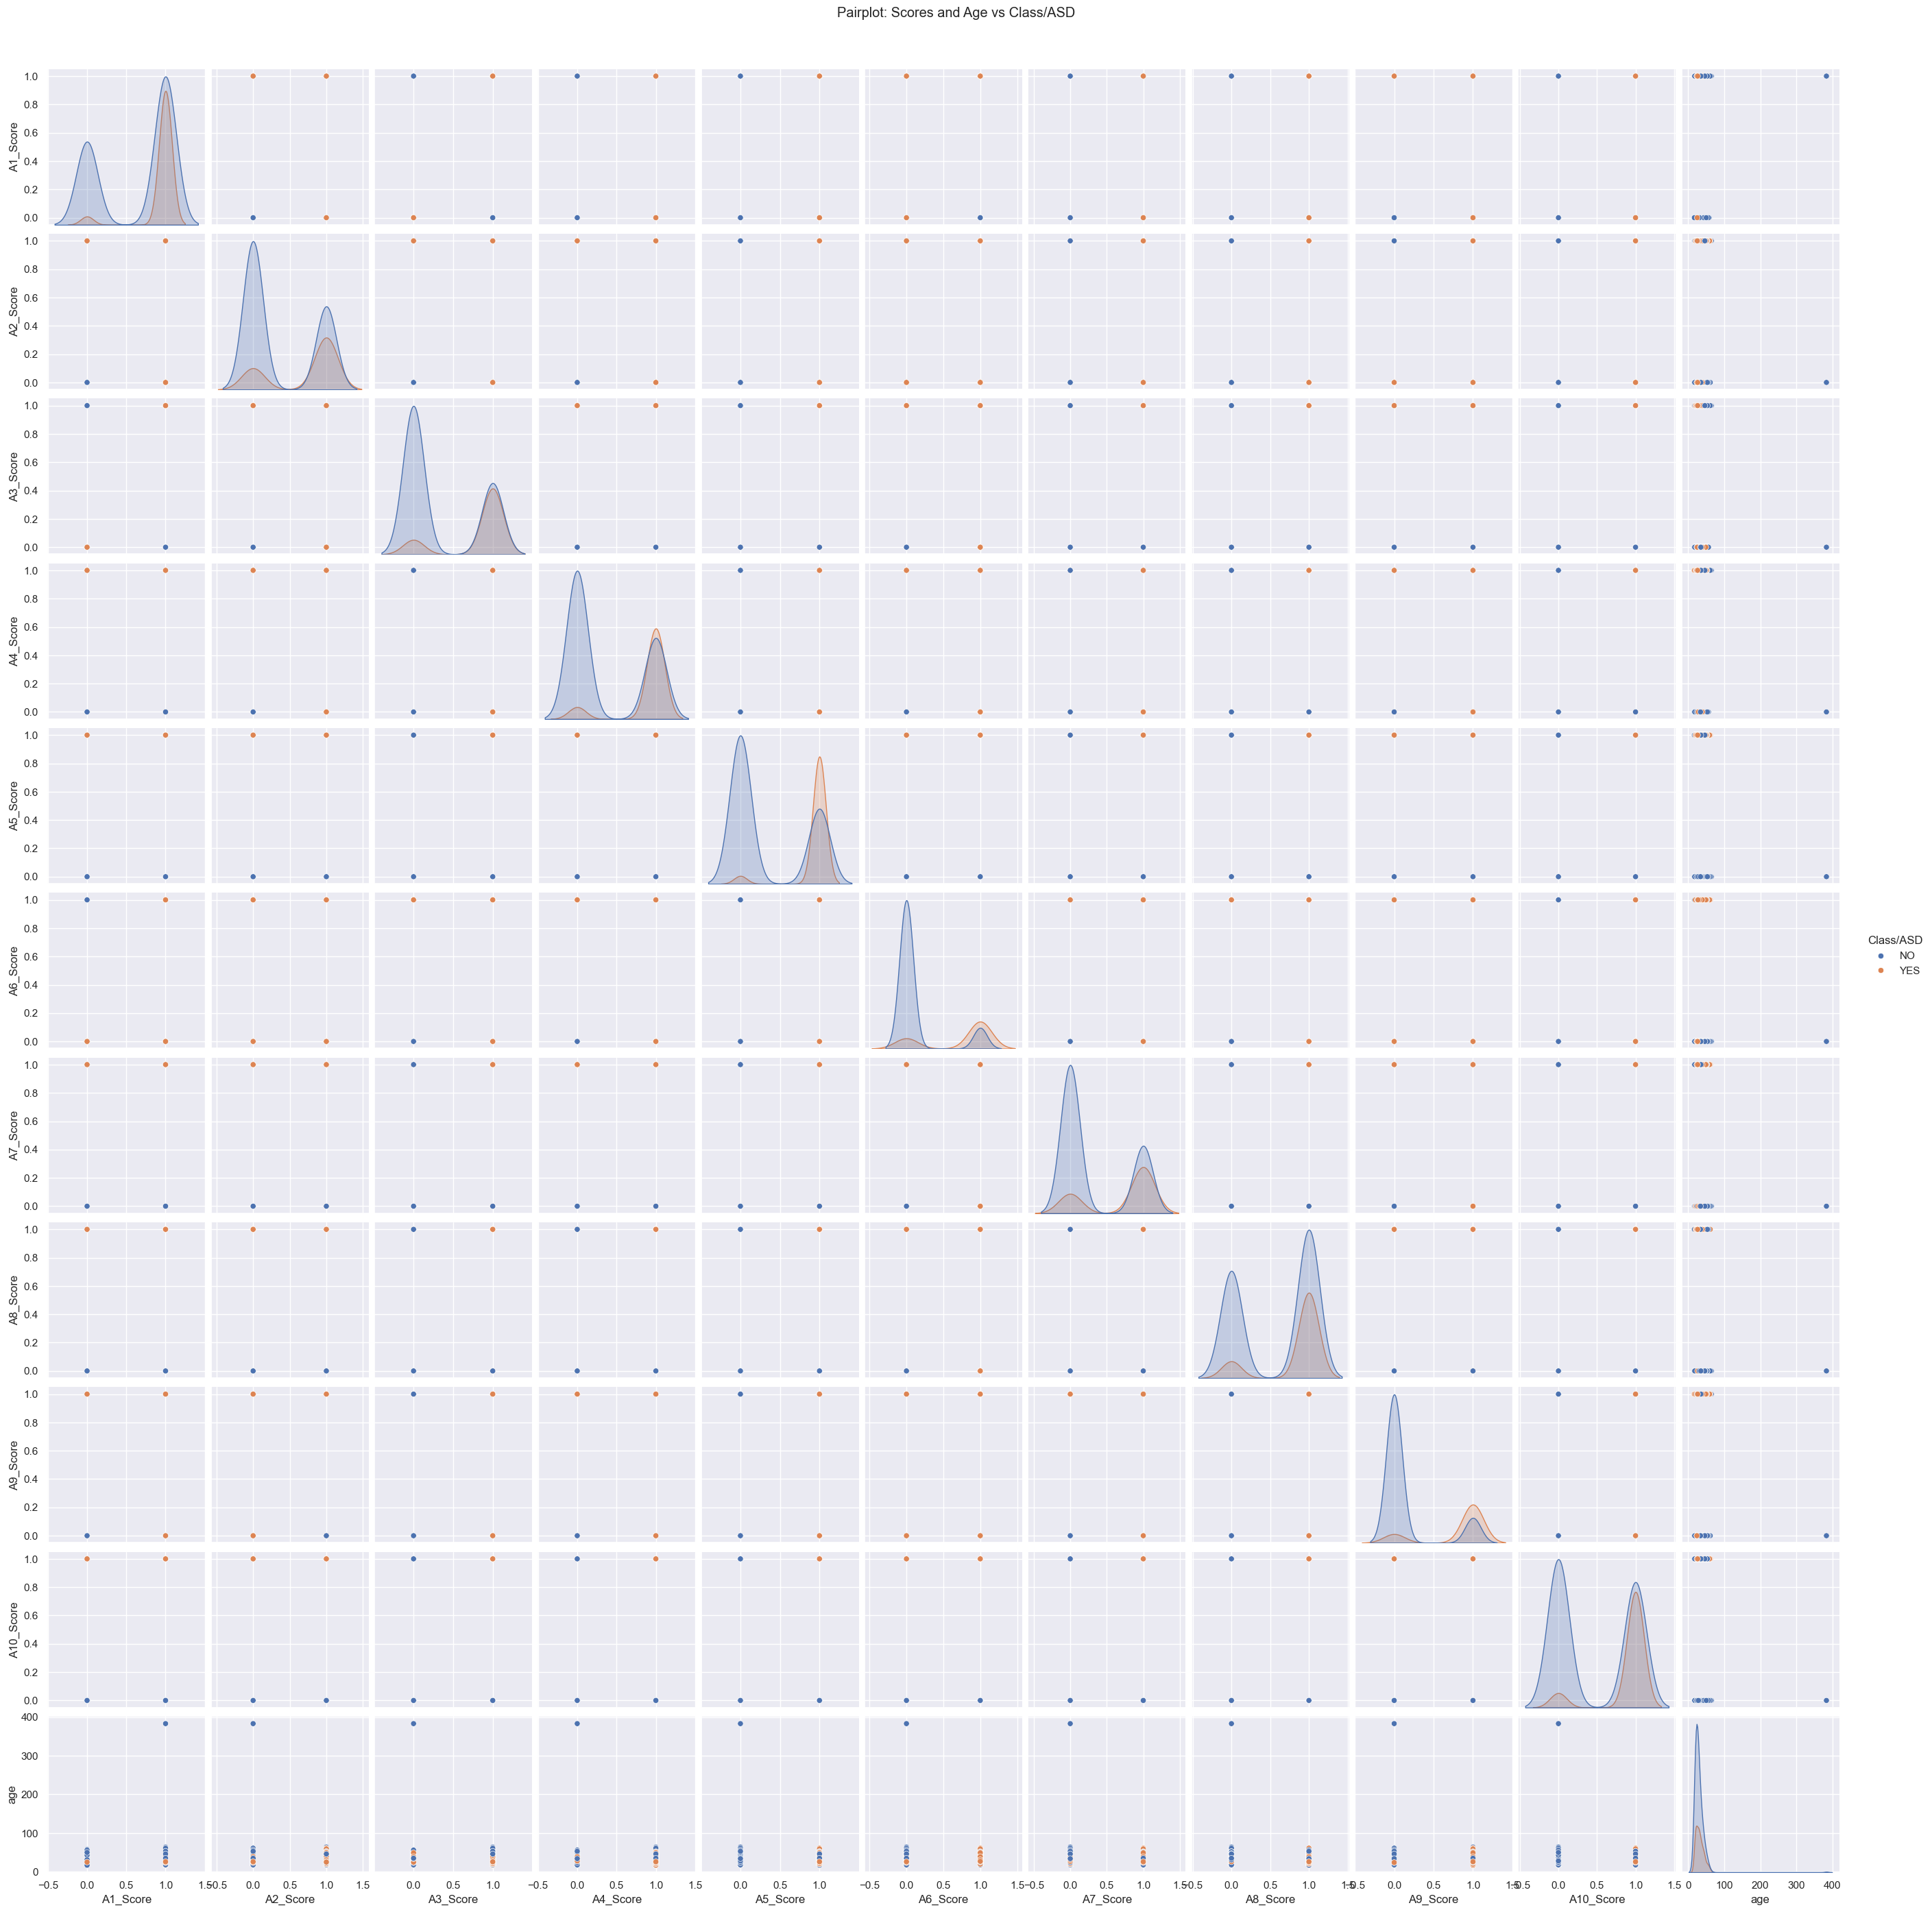

In [16]:
# Pairplot to show relationships between scores and age
score_columns = [f"A{i}_Score" for i in range(1, 11)]
df[score_columns].plot(kind='box', figsize=(10, 6), vert=False, title="Score Distribution (A1 to A10)")
sns.pairplot(df, vars=score_columns + ['age'], hue='Class/ASD', diag_kind='kde')
plt.suptitle("Pairplot: Scores and Age vs Class/ASD", y=1.02)
plt.show()

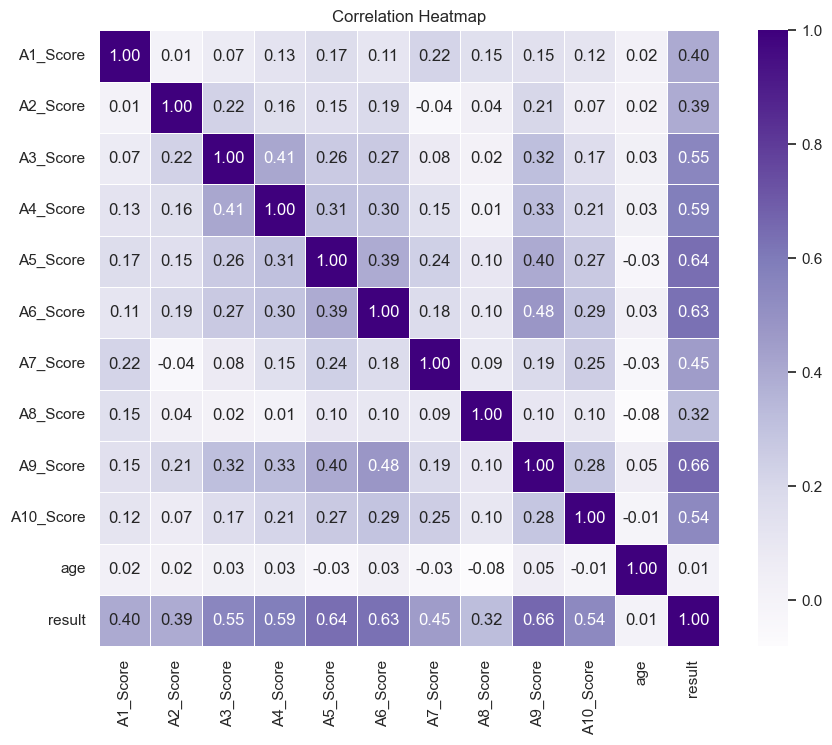

In [17]:
#Heatmap for Correlation Between Numerical Columns

corr = df[score_columns + ['age', 'result']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

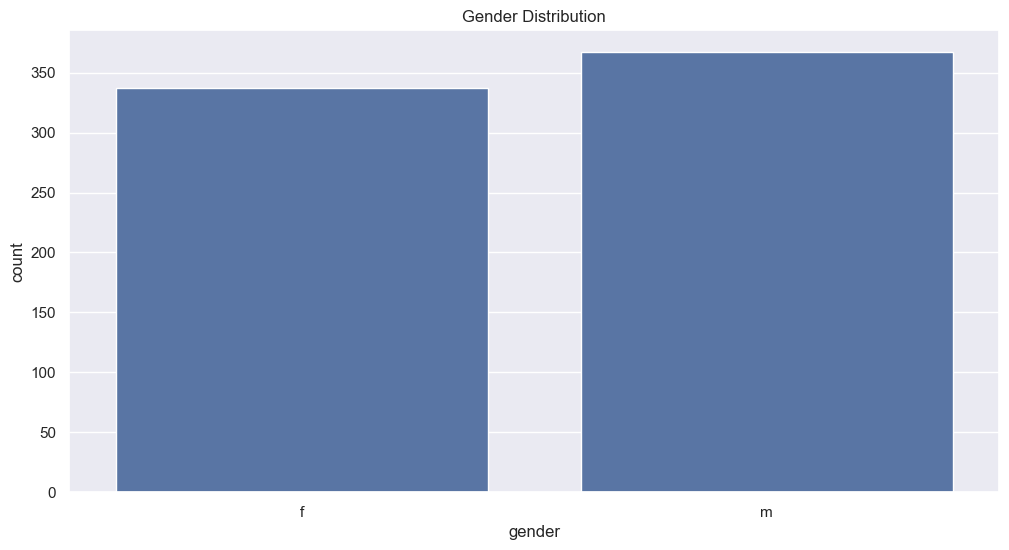

In [18]:
# Count Plot for Categorical Columns

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

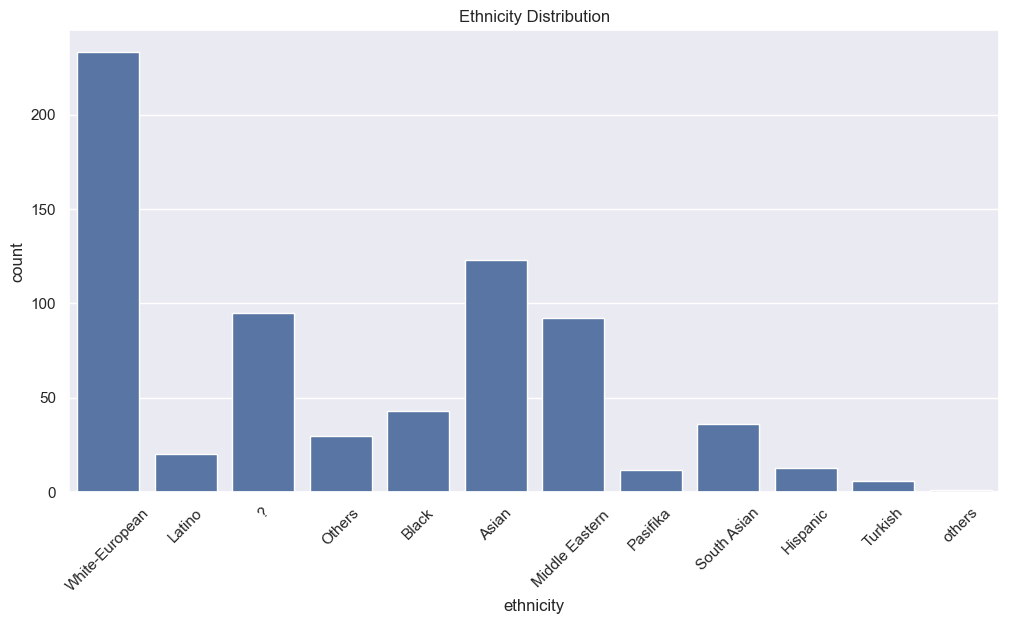

In [19]:
# Count Plot for Ethnicity

plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', data=df)
plt.title("Ethnicity Distribution")
plt.xticks(rotation=45)
plt.show()

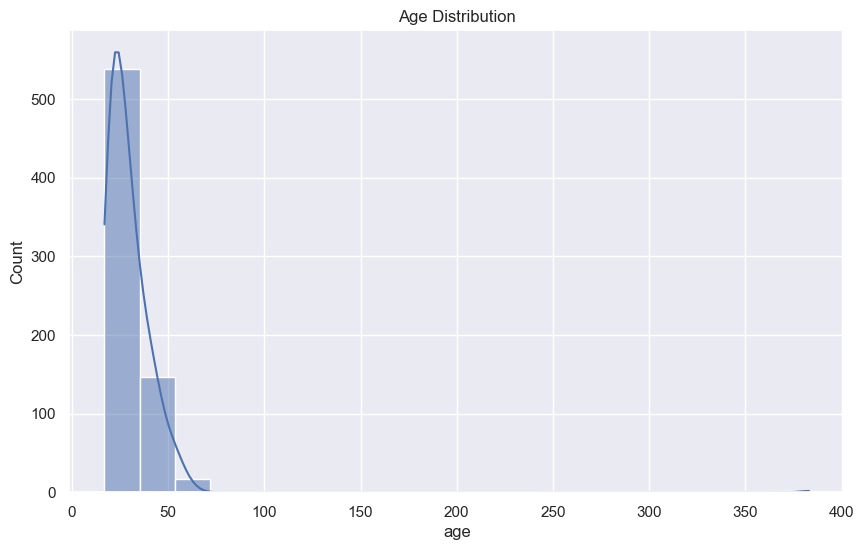

In [20]:
# Age Distribution Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

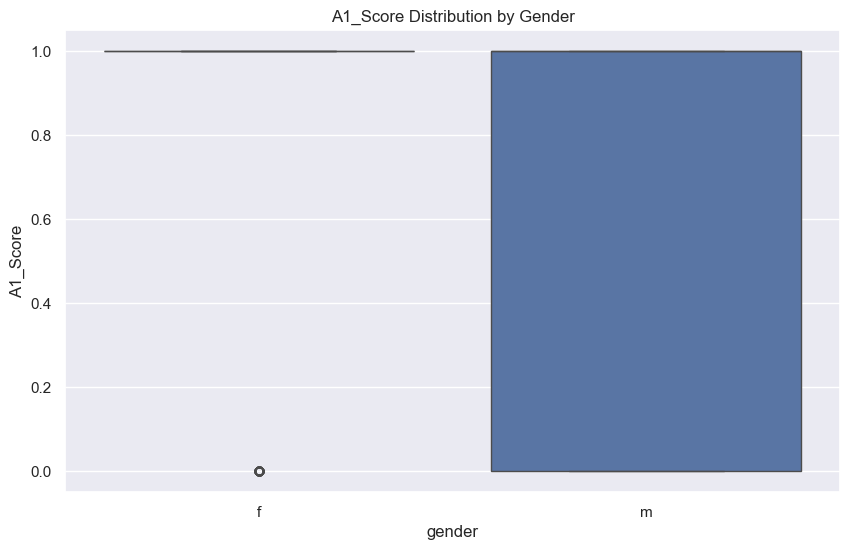

In [21]:
# Boxplot of Scores by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='A1_Score', data=df)
plt.title("A1_Score Distribution by Gender")
plt.show()

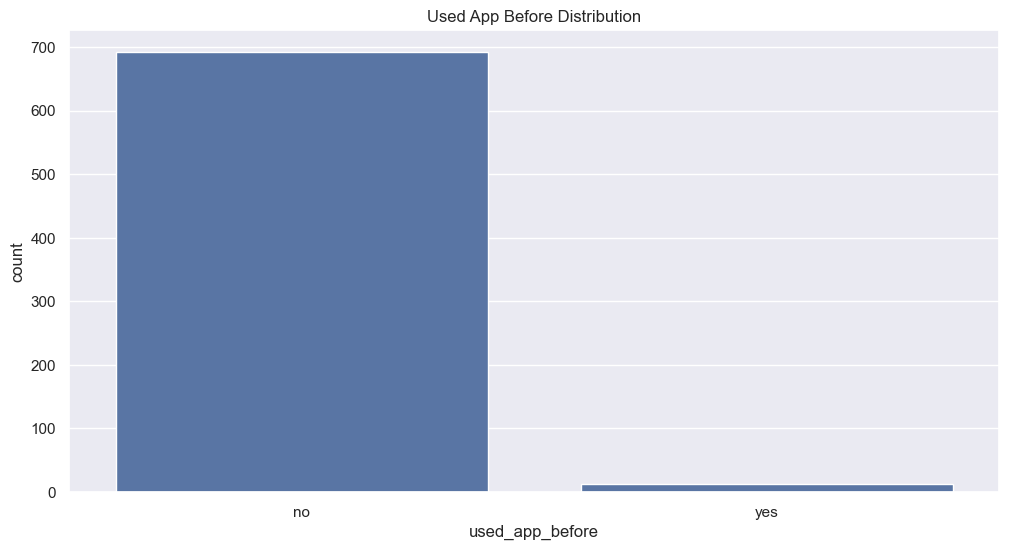

In [22]:
# Count Plot for 'used_app_before'

plt.figure(figsize=(12, 6))
sns.countplot(x='used_app_before', data=df)
plt.title("Used App Before Distribution")
plt.show()

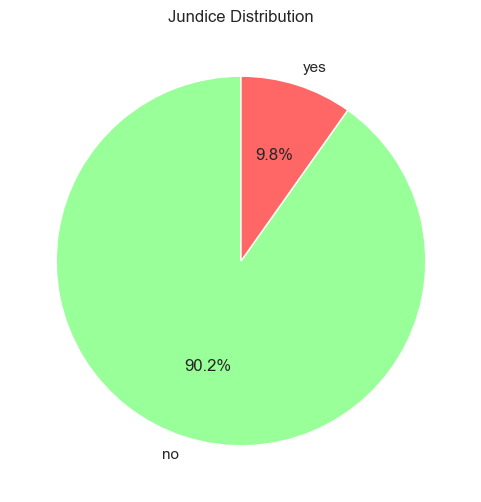

In [23]:
# Pie Chart for 'Jundice' Distribution

jundice_counts = df['jundice'].value_counts()
plt.figure(figsize=(6, 6))
jundice_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#99ff99', '#ff6666'], startangle=90)
plt.title("Jundice Distribution")
plt.ylabel("")
plt.show()

## Data Preprocssing

In [25]:
# Filling missing value

df['age'] = df['age'].fillna(round(df['age'].mean()))

In [26]:
# Droppping duplicate row

df = df.drop_duplicates()

In [27]:
# Filling ? values to others

df['ethnicity'] = df['ethnicity'].replace('?', 'others')
df['relation'] = df['relation'].replace('?', 'Others')

In [28]:
# Dropping unwanted columns and outliers

df.drop(index = 52, inplace = True)
df.reset_index(inplace = True)
df = df.drop('age_desc', axis=1)

In [29]:
# Rearraning columns

new_column_order = [
    'age', 'gender', 'ethnicity', 'jundice', 'austim',
    'contry_of_res', 'used_app_before', 'result', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD'
]

df = df[new_column_order]

In [30]:
df.head(2)

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,26.0,f,White-European,no,no,United States,no,6.0,Self,1,1,1,1,0,0,1,1,0,0,NO
1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,1,1,0,1,0,0,0,1,0,1,NO


In [31]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [32]:
# label Encoding

from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [36]:
model = Sequential([
        Dense(19, activation='relu', input_dim=19),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.25)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2903 - loss: 2.3686 - val_accuracy: 0.6643 - val_loss: 0.6912
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.8026 - val_accuracy: 0.7500 - val_loss: 0.7182
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7527 - loss: 0.6930 - val_accuracy: 0.6929 - val_loss: 0.5765
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.5922 - val_accuracy: 0.7286 - val_loss: 0.5414
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.5521 - val_accuracy: 0.7500 - val_loss: 0.5093
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7766 - loss: 0.4872 - val_accuracy: 0.7286 - val_loss: 0.4745
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.4751 - val_accuracy: 0.7786 - val_loss: 0.4460
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.4718 - val_accuracy: 0.8286 - 

## Model Evaluation

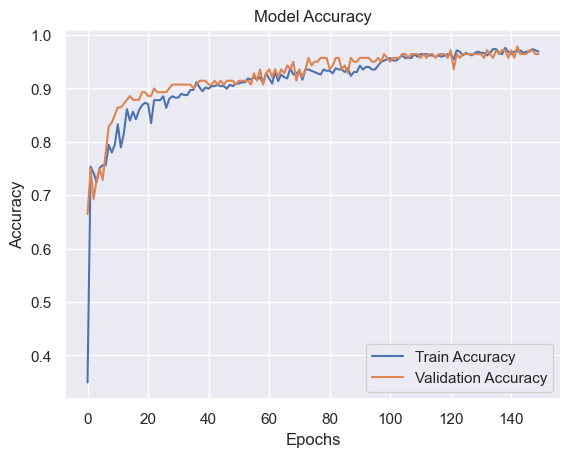

In [40]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

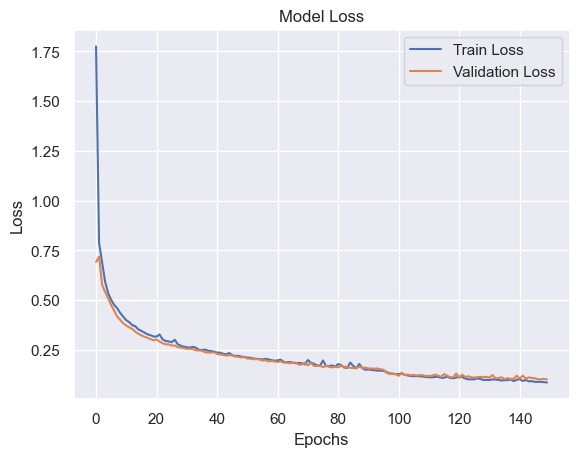

In [41]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()